# DL test

Simple DL test

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Check CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dummy dataset (100 samples, 10 features)
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Simple dataset and loader
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=10)

# Simple model
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.linear(x)

model = SimpleNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train for a few epochs
for epoch in range(3):
    for batch_x, batch_y in loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

print("✅ Test complete.")


Using device: cuda
Epoch 1 - Loss: 1.5664
Epoch 2 - Loss: 1.4742
Epoch 3 - Loss: 1.4267
✅ Test complete.


Simple hERG model.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. Example SMILES and binary hERG activity (1 = active, 0 = inactive)
smiles_list = [
    "CCOc1ccc2nc(S(N)(=O)=O)sc2c1",  # active
    "CC1=C(C(=O)NC(=N1)N)N",         # inactive
    "CCN1C(=O)CN(C)C2=C1C=CC=C2",    # active
    "CC(C)NCC(O)COc1ccc(C(F)(F)F)cc1" # inactive
]
labels = [1, 0, 1, 0]  # Binary hERG activity

# 3. Fingerprint featurizer
def featurize_smiles(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return np.array(fp)

# 4. Custom dataset
class MoleculeDataset(Dataset):
    def __init__(self, smiles_list, labels):
        self.features = []
        self.labels = []
        for smi, lbl in zip(smiles_list, labels):
            fp = featurize_smiles(smi)
            if fp is not None:
                self.features.append(fp)
                self.labels.append(lbl)
        self.features = torch.tensor(self.features, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

dataset = MoleculeDataset(smiles_list, labels)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# 5. Simple binary classifier
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1)  # Single output for binary classification
        )
        
    def forward(self, x):
        return self.net(x).squeeze(1)

model = MLP(2048).to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. Training loop
for epoch in range(5):
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = loss_fn(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")

print("✅ Training complete. Model tested on CUDA pipeline.")


Using device: cuda


[02:04:23] DEPRECATION WARNING: please use MorganGenerator
[02:04:23] DEPRECATION WARNING: please use MorganGenerator
[02:04:23] DEPRECATION WARNING: please use MorganGenerator
[02:04:23] DEPRECATION WARNING: please use MorganGenerator
/tmp/ipykernel_4173/2189943016.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  self.features = torch.tensor(self.features, dtype=torch.float32)


Epoch 1 - Loss: 0.7101
Epoch 2 - Loss: 0.6245
Epoch 3 - Loss: 0.5851
Epoch 4 - Loss: 0.5466
Epoch 5 - Loss: 0.4897
✅ Training complete. Model tested on CUDA pipeline.


GNN model

Using device: cuda


/home/corey/miniconda3/envs/docking_md/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Loss: 1.4992
Epoch 2, Loss: 1.4200
Epoch 3, Loss: 1.4024
Epoch 4, Loss: 1.3862
Epoch 5, Loss: 1.3862
Epoch 6, Loss: 1.3861
Epoch 7, Loss: 1.3861
Epoch 8, Loss: 1.3861
Epoch 9, Loss: 1.3859
Epoch 10, Loss: 1.3860
Epoch 11, Loss: 1.3964
Epoch 12, Loss: 1.3929
Epoch 13, Loss: 1.3854
Epoch 14, Loss: 1.3909
Epoch 15, Loss: 1.3918
Epoch 16, Loss: 1.3851
Epoch 17, Loss: 1.3850
Epoch 18, Loss: 1.3849
Epoch 19, Loss: 1.3899
Epoch 20, Loss: 1.3849
Epoch 21, Loss: 1.3898
Epoch 22, Loss: 1.3847
Epoch 23, Loss: 1.3891
Epoch 24, Loss: 1.3845
Epoch 25, Loss: 1.3885
Epoch 26, Loss: 1.3844
Epoch 27, Loss: 1.3843
Epoch 28, Loss: 1.3842
Epoch 29, Loss: 1.3894
Epoch 30, Loss: 1.3885
Epoch 31, Loss: 1.3840
Epoch 32, Loss: 1.3838
Epoch 33, Loss: 1.3838
Epoch 34, Loss: 1.3897
Epoch 35, Loss: 1.3837
Epoch 36, Loss: 1.3881
Epoch 37, Loss: 1.3877
Epoch 38, Loss: 1.3884
Epoch 39, Loss: 1.3830
Epoch 40, Loss: 1.3829
Epoch 41, Loss: 1.3827
Epoch 42, Loss: 1.3868
Epoch 43, Loss: 1.3827
Epoch 44, Loss: 1.38

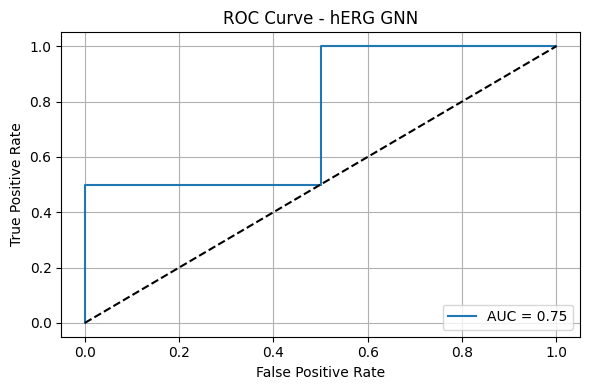

In [3]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from rdkit import Chem
from rdkit.Chem import rdmolops
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Device check
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 2. Example SMILES + binary hERG labels
smiles_list = [
    "CCOc1ccc2nc(S(N)(=O)=O)sc2c1",  # active
    "CC1=C(C(=O)NC(=N1)N)N",         # inactive
    "CCN1C(=O)CN(C)C2=C1C=CC=C2",    # active
    "CC(C)NCC(O)COc1ccc(C(F)(F)F)cc1", # inactive
]
labels = [1, 0, 1, 0]

# 3. Atom and bond featurization
atom_map = {
    'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4, 'P': 5, 'S': 6, 'Cl': 7, 'Br': 8, 'I': 9
}

def mol_to_graph(smiles, label):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Atom features: just atomic number (simple)
    atom_feats = []
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        atom_feats.append([atom_map.get(symbol, len(atom_map))])  # unknown atoms get last index

    # Edge index
    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])  # undirected

    x = torch.tensor(atom_feats, dtype=torch.float)
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    y = torch.tensor([label], dtype=torch.float)

    return Data(x=x, edge_index=edge_index, y=y)

# 4. Custom Dataset
class MoleculeGraphDataset(Dataset):
    def __init__(self, smiles_list, labels):
        self.graphs = [mol_to_graph(smi, lbl) for smi, lbl in zip(smiles_list, labels)]
        self.graphs = [g for g in self.graphs if g is not None]

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx]

dataset = MoleculeGraphDataset(smiles_list, labels)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# 5. GNN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = Linear(hidden_dim, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)  # Pooling over nodes
        return self.lin(x).squeeze(1)

model = GCN(input_dim=1).to(device)  # input_dim=1 for basic atom type
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss()

# 6. Training
model.train()
for epoch in range(100):
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# 7. Evaluation
model.eval()
y_true = []
y_scores = []

with torch.no_grad():
    for batch in loader:
        batch = batch.to(device)
        logits = model(batch)
        probs = torch.sigmoid(logits)
        y_true.extend(batch.y.cpu().numpy())
        y_scores.extend(probs.cpu().numpy())

y_pred = [1 if p > 0.5 else 0 for p in y_scores]

acc = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_scores)
fpr, tpr, _ = roc_curve(y_true, y_scores)

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ ROC AUC: {roc_auc:.4f}")

# 8. Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - hERG GNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

torch.save(model.state_dict(), "herg_gnn.pt")


DTI.

In [4]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import accuracy_score, roc_auc_score

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample data: (SMILES, protein_sequence, label)
data = [
    ("CCO", "MSEQV...", 1),
    ("CCN", "MAVKP...", 0),
    # ... more
]

# Featurizers
def mol_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    atom_feats = [[atom.GetAtomicNum()] for atom in mol.GetAtoms()]
    edge_index = [(b.GetBeginAtomIdx(), b.GetEndAtomIdx()) for b in mol.GetBonds()]
    edge_index += [(j, i) for i, j in edge_index]
    return Data(
        x=torch.tensor(atom_feats, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    )

def seq_to_graph(seq, k=3):
    # A very primitive protein graph: k-mer adjacency
    nodes = [seq[i:i+k] for i in range(len(seq)-k+1)]
    feats = [[hash(km) % 1000] for km in nodes]
    edge_index = [(i, i+1) for i in range(len(nodes)-1)]
    edge_index += [(j, i) for i, j in edge_index]
    return Data(
        x=torch.tensor(feats, dtype=torch.float),
        edge_index=torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    )

# Dataset
class DTIDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.examples = []
        for smiles, seq, label in data:
            l = mol_to_graph(smiles)
            p = seq_to_graph(seq)
            l.y = p.y = torch.tensor([label], dtype=torch.float)
            self.examples.append((l, p))
    def __len__(self):
        return len(self.examples)
    def __getitem__(self, idx):
        return self.examples[idx]

dataset = DTIDataset(data)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Model
class DTIGNN(torch.nn.Module):
    def __init__(self, in_dim=1, hidden=64):
        super().__init__()
        self.lig_conv = GCNConv(in_dim, hidden)
        self.prot_conv = GCNConv(in_dim, hidden)
        self.lin = Linear(hidden * 2, 1)
    def forward(self, lig, prot):
        xl = F.relu(self.lig_conv(lig.x, lig.edge_index))
        xl = global_mean_pool(xl, lig.batch)
        xp = F.relu(self.prot_conv(prot.x, prot.edge_index))
        xp = global_mean_pool(xp, prot.batch)
        x = torch.cat([xl, xp], dim=1)
        return self.lin(x).squeeze(1)

model = DTIGNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train
for epoch in range(5):
    model.train()
    for lig, prot in loader:
        lig, prot = lig.to(device), prot.to(device)
        label = lig.y
        pred = model(lig, prot)
        loss = F.binary_cross_entropy_with_logits(pred, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

# Eval
model.eval()
y_true, y_scores = [], []
for lig, prot in loader:
    lig, prot = lig.to(device), prot.to(device)
    y_true.extend(lig.y.cpu().numpy())
    y_scores.extend(torch.sigmoid(model(lig, prot)).cpu().detach().numpy())

acc = accuracy_score(y_true, [s > 0.5 for s in y_scores])
roc = roc_auc_score(y_true, y_scores)

print("Accuracy:", acc, "ROC AUC:", roc)


Accuracy: 0.5 ROC AUC: 0.0


/home/corey/miniconda3/envs/docking_md/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
